In [2]:
# Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
file_path = './full.csv' 
airbnb_data = pd.read_csv(file_path)

In [3]:
airbnb_data.head()

,id,listing_url,name,picture_url,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,neighbourhood_group,neighbourhood
0,2595,https://www.airbnb.com/rooms/2595,Rental unit in New York · ★4.68 · Studio · 1 b...,https://a0.muscache.com/pictures/miso/Hosting-...,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1 bath,NaN,1.0,"[""Long term stays allowed"", ""Cooking basics"", ...",$240.00,30,1125,4,339,Manhattan,Midtown
1,5121,https://www.airbnb.com/rooms/5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,https://a0.muscache.com/pictures/2090980c-b68e...,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,1.0,1.0,"[""Air conditioning"", ""Wifi"", ""Kitchen"", ""Heati...",$66.00,30,730,30,88,Brooklyn,Bedford-Stuyvesant
2,6848,https://www.airbnb.com/rooms/6848,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,https://a0.muscache.com/pictures/e4f031a7-f146...,40.70935,-73.95342,Entire rental unit,Entire home/apt,3,1 bath,2.0,1.0,"[""Cooking basics"", ""Microwave"", ""Extra pillows...",$81.00,30,730,0,142,Brooklyn,Williamsburg
3,6990,https://www.airbnb.com/rooms/6990,Rental unit in New York · ★4.88 · 1 bedroom · ...,https://a0.muscache.com/pictures/be6cd5b3-9295...,40.78778,-73.94759,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,"[""Hair dryer"", ""Air conditioning"", ""Fire extin...",$70.00,30,365,0,93,Manhattan,East Harlem
4,6872,https://www.airbnb.com/rooms/6872,Condo in New York · 1 bedroom · 1 bed · 1 shar...,https://a0.muscache.com/pictures/miso/Hosting-...,40.80107,-73.94255,Private room in condo,Private room,1,1 shared bath,1.0,1.0,"[""Fire extinguisher"", ""Long term stays allowed...",$65.00,30,180,24,359,Manhattan,East Harlem


In [5]:
airbnb_data.shape

(39627, 20)

# I. Data Exploration

## 1. THÔNG TIN CƠ BẢN VỀ DỮ LIỆU

In [4]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39627 entries, 0 to 39626
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39627 non-null  int64  
 1   listing_url          39627 non-null  object 
 2   name                 39627 non-null  object 
 3   picture_url          39627 non-null  object 
 4   latitude             39627 non-null  float64
 5   longitude            39627 non-null  float64
 6   property_type        39627 non-null  object 
 7   room_type            39627 non-null  object 
 8   accommodates         39627 non-null  int64  
 9   bathrooms_text       39590 non-null  object 
 10  bedrooms             36218 non-null  float64
 11  beds                 38972 non-null  float64
 12  amenities            39627 non-null  object 
 13  price                39627 non-null  object 
 14  minimum_nights       39627 non-null  int64  
 15  maximum_nights       39627 non-null 

## 2. KIỂM TRA DỮ LIỆU THIẾU


Dữ liệu thiếu:
 bedrooms               3409
beds                    655
bathrooms_text           37
neighbourhood_group       0
availability_365          0
availability_30           0
maximum_nights            0
minimum_nights            0
price                     0
amenities                 0
id                        0
listing_url               0
accommodates              0
room_type                 0
property_type             0
longitude                 0
latitude                  0
picture_url               0
name                      0
neighbourhood             0
dtype: int64


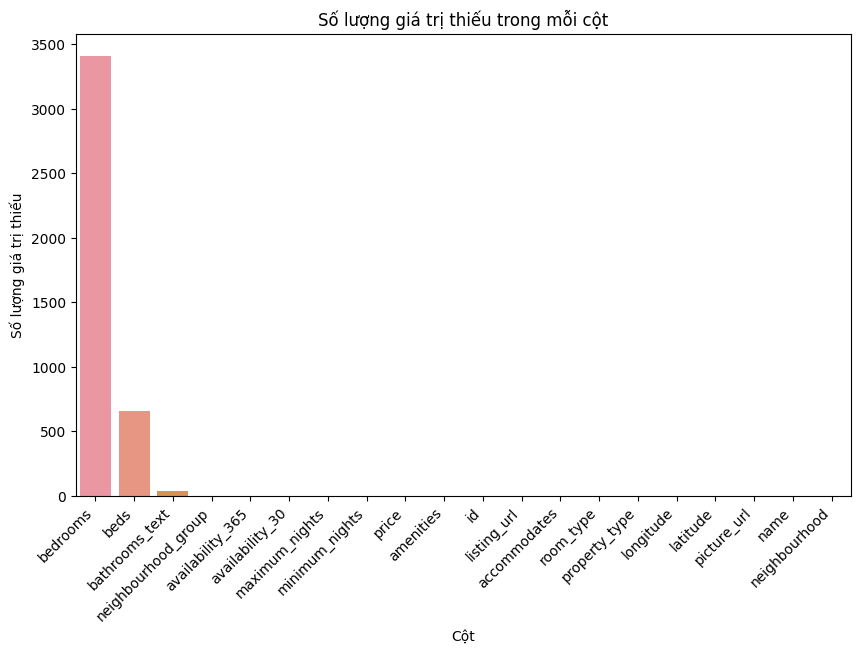

In [5]:
missing_data = airbnb_data.isnull().sum().sort_values(ascending=False)
print("\nDữ liệu thiếu:\n", missing_data)

# Vẽ biểu đồ dữ liệu thiếu
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=45, ha='right')
plt.title('Số lượng giá trị thiếu trong mỗi cột')
plt.xlabel('Cột')
plt.ylabel('Số lượng giá trị thiếu')
plt.show()

# II. Data Preparation

## 1. Chuyển đổi cột 'price' từ dạng chuỗi sang dạng số


In [6]:
airbnb_data['price'] = airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\phand\AppData\Local\Temp\ipykernel_18488\3441227785.py:1: SyntaxWarning: invalid escape sequence '\$'
  airbnb_data['price'] = airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)


## 2. Điền dữ liệu thiếu


In [7]:
airbnb_data = airbnb_data.dropna()


In [8]:
missing_data = airbnb_data.isnull().sum().sort_values(ascending=False)
print("\nDữ liệu thiếu:\n", missing_data)


Dữ liệu thiếu:
 id                     0
listing_url            0
neighbourhood_group    0
availability_365       0
availability_30        0
maximum_nights         0
minimum_nights         0
price                  0
amenities              0
beds                   0
bedrooms               0
bathrooms_text         0
accommodates           0
room_type              0
property_type          0
longitude              0
latitude               0
picture_url            0
name                   0
neighbourhood          0
dtype: int64


In [9]:
airbnb_data['beds_per_bedroom'] = airbnb_data['beds'] / airbnb_data['bedrooms']


In [11]:
from geopy.distance import geodesic

# Ví dụ: tạo một hàm tính khoảng cách giữa hai tọa độ
def calculate_distance(row):
    rental_location = (row['latitude'], row['longitude'])
    city_center = (40.7128, -74.0060)  # Thay thế tọa độ trung tâm
    return geodesic(rental_location, city_center).kilometers

# Áp dụng hàm tính khoảng cách để tạo cột mới
airbnb_data['distance_to_center'] = airbnb_data.apply(calculate_distance, axis=1)


In [14]:
airbnb_data = airbnb_data.drop(['latitude', 'longitude'], axis=1)


In [15]:
airbnb_data.head()

,id,listing_url,name,picture_url,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,neighbourhood_group,neighbourhood,beds_per_bedroom,distance_to_center
2,6848,https://www.airbnb.com/rooms/6848,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,https://a0.muscache.com/pictures/e4f031a7-f146...,Entire rental unit,Entire home/apt,3,1 bath,2.0,1.0,"[""Cooking basics"", ""Microwave"", ""Extra pillows...",81.0,30,730,0,142,Brooklyn,Williamsburg,0.5,4.459576
3,6990,https://www.airbnb.com/rooms/6990,Rental unit in New York · ★4.88 · 1 bedroom · ...,https://a0.muscache.com/pictures/be6cd5b3-9295...,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,"[""Hair dryer"", ""Air conditioning"", ""Fire extin...",70.0,30,365,0,93,Manhattan,East Harlem,1.0,9.677955
4,6872,https://www.airbnb.com/rooms/6872,Condo in New York · 1 bedroom · 1 bed · 1 shar...,https://a0.muscache.com/pictures/miso/Hosting-...,Private room in condo,Private room,1,1 shared bath,1.0,1.0,"[""Fire extinguisher"", ""Long term stays allowed...",65.0,30,180,24,359,Manhattan,East Harlem,1.0,11.171073
5,7097,https://www.airbnb.com/rooms/7097,Home in Brooklyn · ★4.88 · 1 bedroom · 2 beds ...,https://a0.muscache.com/pictures/miso/Hosting-...,Private room in home,Private room,2,1 private bath,1.0,2.0,"[""Outdoor dining area"", ""Long term stays allow...",205.0,2,1125,5,276,Brooklyn,Fort Greene,2.0,3.567935
6,7064,https://www.airbnb.com/rooms/7064,Loft in Brooklyn · ★4.91 · 1 bedroom · 1 bed ·...,https://a0.muscache.com/pictures/13708959/7e74...,Private room in loft,Private room,2,1 shared bath,1.0,1.0,"[""Air conditioning"", ""Iron"", ""Heating"", ""Essen...",95.0,30,45,0,26,Brooklyn,Williamsburg,1.0,3.987691


In [16]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35640 entries, 2 to 39626
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   35640 non-null  int64  
 1   listing_url          35640 non-null  object 
 2   name                 35640 non-null  object 
 3   picture_url          35640 non-null  object 
 4   property_type        35640 non-null  object 
 5   room_type            35640 non-null  object 
 6   accommodates         35640 non-null  int64  
 7   bathrooms_text       35640 non-null  object 
 8   bedrooms             35640 non-null  float64
 9   beds                 35640 non-null  float64
 10  amenities            35640 non-null  object 
 11  price                35640 non-null  float64
 12  minimum_nights       35640 non-null  int64  
 13  maximum_nights       35640 non-null  int64  
 14  availability_30      35640 non-null  int64  
 15  availability_365     35640 non-null  int6

In [54]:
airbnb_data.to_csv('final_dataset.csv', index=False)

In [23]:
test_data = airbnb_data

In [27]:
import ast
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Chuyển đổi tiện nghi thành danh sách, thay NaN bằng danh sách rỗng
airbnb_data['amenities'] = airbnb_data['amenities'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else (x if isinstance(x, list) else [])
)

# Đếm số lượng tiện nghi trong mỗi danh sách
airbnb_data['amenity_count'] = airbnb_data['amenities'].apply(len)

airbnb_data = airbnb_data.drop(['amenities'], axis=1)


In [46]:
airbnb_data.shape

(35640, 20)

In [53]:
airbnb_data.head()

,picture_url,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,...,distance_to_center,amenity_count,room_type_Entire home/apt,room_type_Other,room_type_Private room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
2,https://a0.muscache.com/pictures/e4f031a7-f146...,3,1,2.0,1.0,81.0,30,730,0,142,...,4.459576,26,True,False,False,False,True,False,False,False
3,https://a0.muscache.com/pictures/be6cd5b3-9295...,1,1,1.0,1.0,70.0,30,365,0,93,...,9.677955,19,False,False,True,False,False,True,False,False
4,https://a0.muscache.com/pictures/miso/Hosting-...,1,1,1.0,1.0,65.0,30,180,24,359,...,11.171073,18,False,False,True,False,False,True,False,False
5,https://a0.muscache.com/pictures/miso/Hosting-...,2,1,1.0,2.0,205.0,2,1125,5,276,...,3.567935,49,False,False,True,False,True,False,False,False
6,https://a0.muscache.com/pictures/13708959/7e74...,2,1,1.0,1.0,95.0,30,45,0,26,...,3.987691,15,False,False,True,False,True,False,False,False


In [30]:
# Tính tần suất xuất hiện của từng loại trong room_type
room_type_freq = airbnb_data['room_type'].value_counts(normalize=True)

# Chuyển loại phòng có tần suất dưới 5% thành 'Other'
airbnb_data['room_type'] = airbnb_data['room_type'].apply(
    lambda x: 'Other' if room_type_freq[x] < 0.05 else x
)

In [31]:
# Áp dụng One-Hot Encoding cho room_type
room_type_dummies = pd.get_dummies(airbnb_data['room_type'], prefix='room_type')

# Kết hợp các cột mới vào DataFrame ban đầu
airbnb_data = pd.concat([airbnb_data, room_type_dummies], axis=1)

# Xóa cột room_type nếu không cần thiết
airbnb_data = airbnb_data.drop('room_type', axis=1)


In [33]:
airbnb_data = airbnb_data.drop('name', axis=1)


In [35]:
airbnb_data = airbnb_data.drop('property_type', axis=1)


In [52]:
airbnb_data = airbnb_data.drop('id', axis=1)


In [38]:
import re

# Lấy giá trị số đầu tiên trong cột bathrooms_text nếu có
airbnb_data['bathrooms_text'] = airbnb_data['bathrooms_text'].apply(
    lambda x: re.findall(r'\d+', str(x))[0] if pd.notnull(x) and re.findall(r'\d+', str(x)) else None
)


In [47]:
num_unique_values = airbnb_data['neighbourhood_group'].nunique()
print(f"Số lượng giá trị khác nhau trong 'neighbourhood_group': {num_unique_values}")


Số lượng giá trị khác nhau trong 'neighbourhood_group': 5


In [48]:
unique_values = airbnb_data['neighbourhood_group'].value_counts()
print(unique_values)


neighbourhood_group
Manhattan        14805
Brooklyn         13474
Queens            5744
Bronx             1273
Staten Island      344
Name: count, dtype: int64


In [49]:
# Sử dụng One-Hot Encoding cho cột neighbourhood_group
neighbourhood_group_dummies = pd.get_dummies(airbnb_data['neighbourhood_group'], prefix='neighbourhood_group')

# Kết hợp các cột mới vào DataFrame ban đầu
airbnb_data = pd.concat([airbnb_data, neighbourhood_group_dummies], axis=1)

# Xóa cột neighbourhood_group nếu không cần thiết
airbnb_data = airbnb_data.drop('neighbourhood_group', axis=1)


# III. Model & Evaluate

# IV. Explain AI

## 1. Global understanding

## 2. Local explanations